C:\Users\sowmy\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - loss: 0.2704 - val_loss: 0.1259
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.1907 - val_loss: 0.0644
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.0970 - val_loss: 0.0329
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.0586 - val_loss: 0.0642
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0803 - val_loss: 0.0850
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0726 - val_loss: 0.0593
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0509 - val_loss: 0.0399
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0529 - val_loss: 0.0337
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 0.0555 - val_loss: 0.0335
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 0.0613 - val_loss: 0.0339
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0633 - val_loss: 0.0337
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0671 - v

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0532 - val_loss: 0.0410
Epoch 70/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - loss: 0.0593 - val_loss: 0.0402
Epoch 71/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 0.0536 - val_loss: 0.0394
Epoch 72/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 0.0552 - val_loss: 0.0382
Epoch 73/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.0608 - val_loss: 0.0369
Epoch 74/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 0.0597 - val_loss: 0.0365
Epoch 75/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0505 - val_loss: 0.0370
Epoch 76/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0483 - val_loss: 0.0387
Epoch 77/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0530 - val_loss: 0.0415
Epoch 78/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0572 - val_loss: 0.0432
Epoch 79/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0608 - val_loss: 0.0427
Epoch 80/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 0.0487 - val_

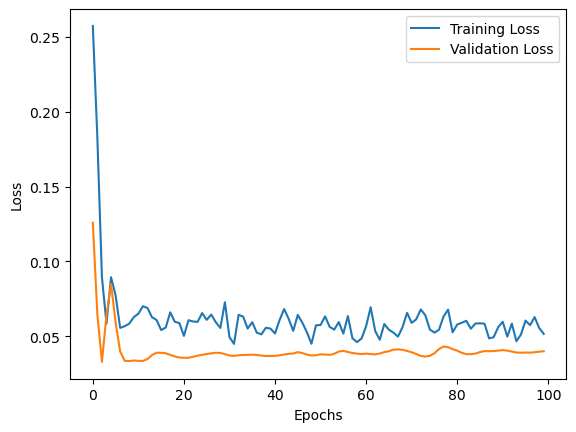

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 925ms/step


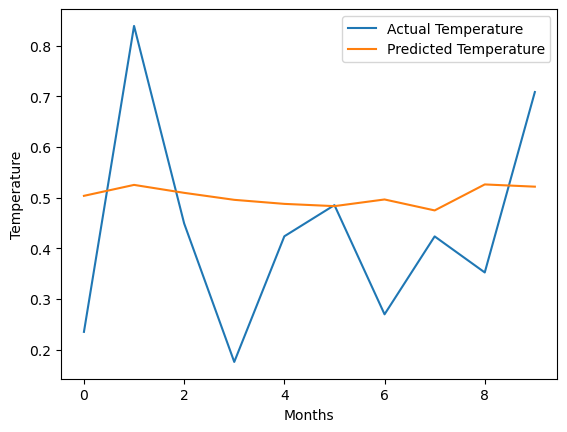

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Step 1: Generate synthetic monthly temperature data
np.random.seed(0)
num_months = 60  # Number of months
temperature_mean = 25  # Mean temperature
temperature_std = 5  # Standard deviation of temperature
temperature_data = np.random.normal(loc=temperature_mean, scale=temperature_std, size=num_months)

# Step 2: Preprocess the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
temperature_data = scaler.fit_transform(temperature_data.reshape(-1, 1)).flatten()  # Normalize the data
X = []  # List to store input sequences
y = []  # List to store output labels
look_back = 12  # Number of months to look back for prediction

for i in range(len(temperature_data) - look_back):
    X.append(temperature_data[i:(i + look_back)])
    y.append(temperature_data[i + look_back])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Step 3: Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Step 4: Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Step 6: Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Train Loss: {train_loss}, Test Loss: {test_loss}")

# Visualize training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 7: Make predictions and visualize results
predicted_temperatures = model.predict(X_test)
plt.plot(y_test, label='Actual Temperature')
plt.plot(predicted_temperatures, label='Predicted Temperature')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.legend()
plt.show()


Train Loss: 0.032855402678251266, Test Loss: 0.04002324864268303
MAE: 4.022503546740114, RMSE: 4.8241457382491575


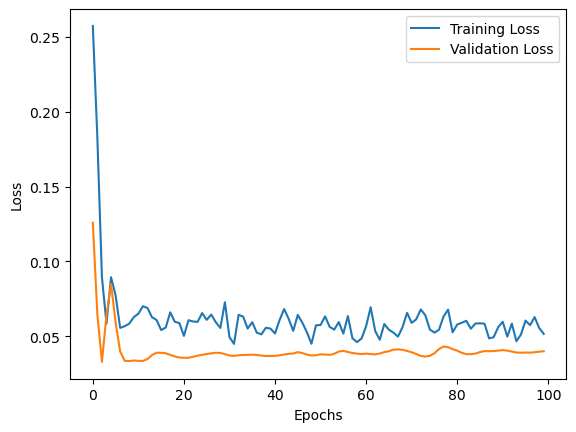

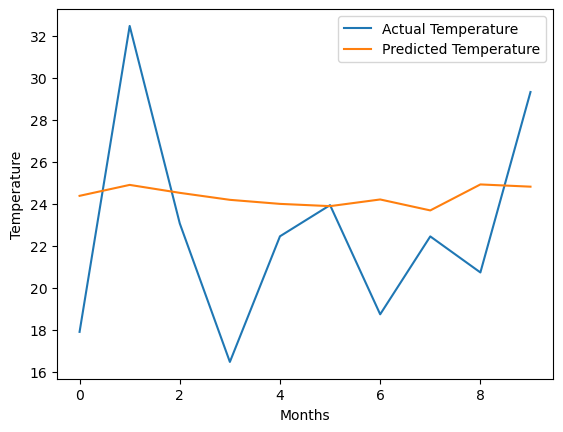

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 6: Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Train Loss: {train_loss}, Test Loss: {test_loss}")

# Calculate evaluation metrics: MAE and RMSE
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
predicted_temperatures_inverse = scaler.inverse_transform(predicted_temperatures)
mae = mean_absolute_error(y_test_inverse, predicted_temperatures_inverse)
rmse = np.sqrt(mean_squared_error(y_test_inverse, predicted_temperatures_inverse))
print(f"MAE: {mae}, RMSE: {rmse}")

# Visualize training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 7: Make predictions and visualize results
plt.plot(y_test_inverse, label='Actual Temperature')
plt.plot(predicted_temperatures_inverse, label='Predicted Temperature')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.legend()
plt.show()

